___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Libraries
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Tran-test split
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
#Build neural network
from keras.models import Sequential
from keras.layers import Dense

# Net 
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #Activation function could be changed
model.add(Dense(1, activation='sigmoid')) #Output layer should be sigmoid for binary problems (0,1)

# Optimizer setup
model.compile(loss='binary_crossentropy',#Cost function
              optimizer='sgd',
              metrics=['accuracy'])

# Net training
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 968us/step - loss: 0.7883 - accuracy: 0.4916
Epoch 2/200
6/6 [==============================] - 0s 654us/step - loss: 0.7734 - accuracy: 0.5047
Epoch 3/200
6/6 [==============================] - 0s 690us/step - loss: 0.7598 - accuracy: 0.5121
Epoch 4/200
6/6 [==============================] - 0s 670us/step - loss: 0.7462 - accuracy: 0.5140
Epoch 5/200
6/6 [==============================] - 0s 624us/step - loss: 0.7339 - accuracy: 0.5233
Epoch 6/200
6/6 [==============================] - 0s 579us/step - loss: 0.7221 - accuracy: 0.5363
Epoch 7/200
6/6 [==============================] - 0s 617us/step - loss: 0.7106 - accuracy: 0.5456
Epoch 8/200
6/6 [==============================] - 0s 632us/step - loss: 0.7001 - accuracy: 0.5493
Epoch 9/200
6/6 [==============================] - 0s 666us/step - loss: 0.6898 - accuracy: 0.5661
Epoch 10/200
6/6 [==============================] - 0s 622us/step - loss: 0.6799 - accuracy: 0.5717
Epoch 11/

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

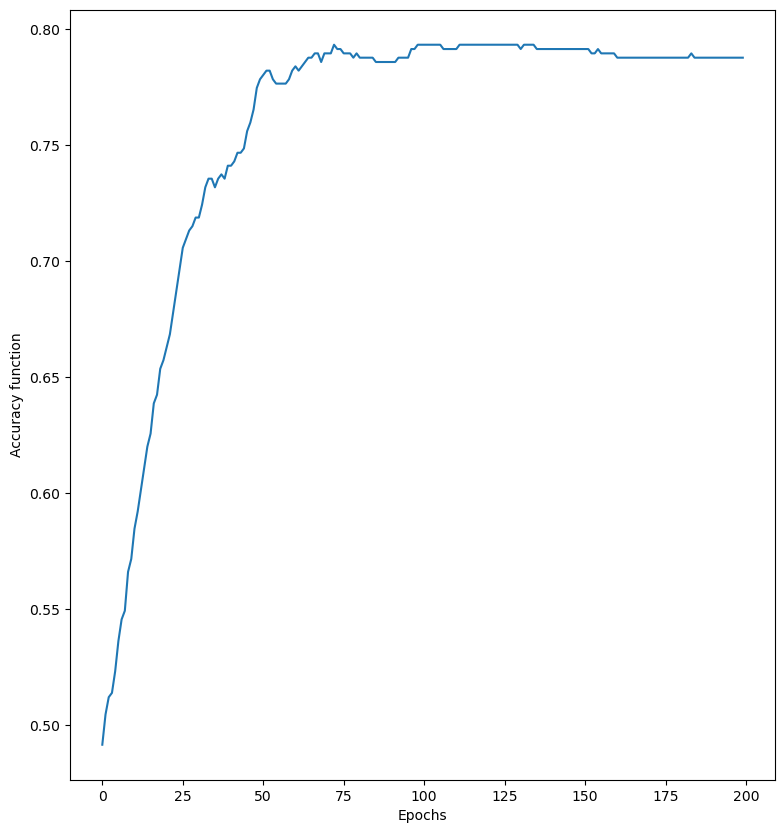

In [11]:
#Check accuracy
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [12]:
#Use model to predict probability and class
Y_pred = model.predict(X_test) #Probability terms
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #Class terms


8/8 [==============================] - 0s 490us/step


In [17]:
[v[0] for v in Y_pred]

[0.29451472,
 0.14283799,
 0.12482773,
 0.1795731,
 0.5652964,
 0.45873708,
 0.021898495,
 0.6286815,
 0.65718555,
 0.75915563,
 0.23916696,
 0.87896067,
 0.42505318,
 0.32158217,
 0.05856866,
 0.39314654,
 0.105068095,
 0.048415933,
 0.87984574,
 0.6607921,
 0.20305267,
 0.0556971,
 0.6320569,
 0.07376914,
 0.54280275,
 0.87882686,
 0.08425683,
 0.053405743,
 0.2966876,
 0.106460996,
 0.87478286,
 0.8013943,
 0.78609604,
 0.87722784,
 0.6088385,
 0.65634865,
 0.7221369,
 0.29147464,
 0.40195966,
 0.7904913,
 0.04532212,
 0.59154075,
 0.42728654,
 0.27317265,
 0.045438234,
 0.6423265,
 0.5050941,
 0.19151506,
 0.35680035,
 0.94520754,
 0.034364708,
 0.6394662,
 0.74758863,
 0.2710892,
 0.1887524,
 0.029083889,
 0.799334,
 0.018627238,
 0.4172649,
 0.8627648,
 0.7012466,
 0.30152303,
 0.38694793,
 0.2267982,
 0.0826533,
 0.5352469,
 0.03445751,
 0.7960703,
 0.060002506,
 0.6734925,
 0.7567729,
 0.05109227,
 0.21226212,
 0.11647893,
 0.06672516,
 0.3367421,
 0.27493602,
 0.14394675,
 0.1

In [18]:
[v[0] for v in Y_prob]

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [21]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #The bigger the better

#Train metrics
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#Test metrics
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 363us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.788 	 0.737 	 0.612
  Test 	 0.740 	 0.632 	 0.600


**Multiclass example**

- Even tho outputs of neural nets are limited between 0 and 1, it's not guaranteed that the sum is 1
- Transform outputs so they can be used as probabilities cound help interpretability
- Softmax transformation

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [23]:
#Libraries
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [27]:
#Data
iris = datasets.load_iris()
X = iris.data
Y = iris.target #Tree flower types


In [25]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
#cChange output variable(y) so it can be used in the net
dummy_y = to_categorical(Y).astype(int)

In [29]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [30]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [31]:
#Net 

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#output

#Gradient descendent
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# Optmizer
model.compile(loss='categorical_crossentropy',#cost
              optimizer=sgd,
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 0s 74ms/step - loss: 4.2499 - accuracy: 0.3583 - val_loss: 2.5782 - val_accuracy: 0.3000
Epoch 2/200
2/2 [==============================] - 0s 11ms/step - loss: 2.1913 - accuracy: 0.3667 - val_loss: 1.6849 - val_accuracy: 0.3667
Epoch 3/200
2/2 [==============================] - 0s 12ms/step - loss: 1.6841 - accuracy: 0.4083 - val_loss: 0.8261 - val_accuracy: 0.5667
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.7723 - accuracy: 0.6250 - val_loss: 0.7593 - val_accuracy: 0.6333
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 0.6761 - accuracy: 0.6750 - val_loss: 0.5160 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 12ms/step - loss: 0.5263 - accuracy: 0.6667 - val_loss: 0.4844 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 0.5038 - accuracy: 0.6583 - val_loss: 0.4535 - val_accuracy: 0.7333
Epoch 8/200
2/2 [===

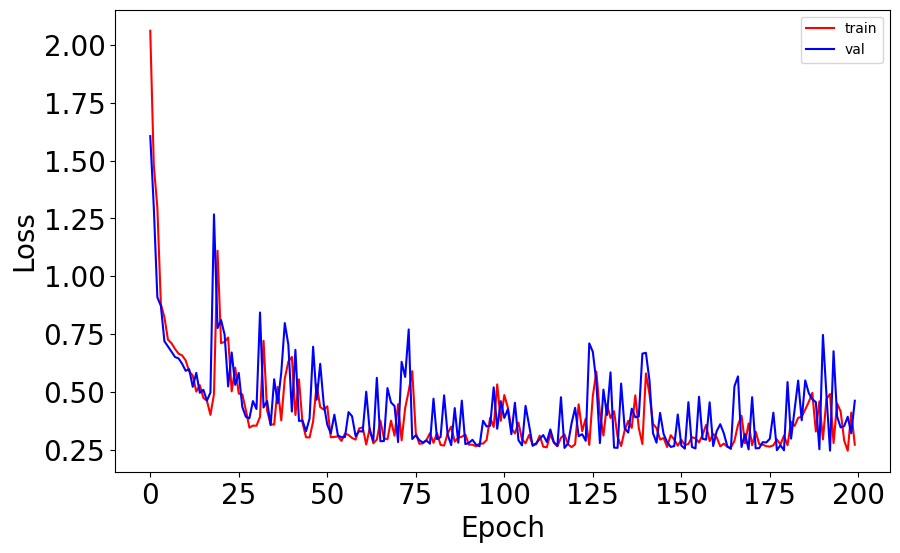

In [32]:
#Plot chart
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [33]:
#Predict with model
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 12ms/step


In [34]:
Y_pred

array([[3.73430157e-05, 9.97981429e-01, 1.98113639e-03],
       [9.99671102e-01, 3.28877300e-04, 1.64659752e-20],
       [3.72857220e-17, 2.51070778e-05, 9.99974847e-01],
       [3.64215630e-05, 9.97270167e-01, 2.69348198e-03],
       [3.05417307e-05, 9.99378443e-01, 5.91085525e-04],
       [9.99306917e-01, 6.93020294e-04, 4.79417081e-19],
       [1.78208090e-02, 9.82177496e-01, 1.80840868e-06],
       [1.13091616e-07, 6.67591691e-01, 3.32408249e-01],
       [1.65018332e-06, 9.00571108e-01, 9.94273126e-02],
       [2.45343614e-03, 9.97529805e-01, 1.67357375e-05],
       [4.80125493e-07, 8.25760603e-01, 1.74238876e-01],
       [9.98610497e-01, 1.38946378e-03, 1.11594333e-17],
       [9.99720037e-01, 2.79992557e-04, 7.95310087e-21],
       [9.98736918e-01, 1.26304850e-03, 7.24683753e-18],
       [9.99498606e-01, 5.01344097e-04, 1.10839488e-19],
       [7.72457497e-05, 9.99451339e-01, 4.71438107e-04],
       [4.30743440e-13, 6.26457797e-04, 9.99373615e-01],
       [1.01722067e-03, 9.98897

In [35]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [36]:

#reverse engineering to get original y classes
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [37]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [38]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#Train metrics
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#Test metrics
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 9ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.950 	 0.953 	 0.950
  Test 	 0.867 	 0.908 	 0.867
